In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap 

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("From URL: ", s)

From URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


##### Фильтруем строки по значениям 'Iris-versicolor' и 'Iris-setosa' и заменяем их на 1 и 0 соответственно.


In [4]:
y = df[df[4].isin(['Iris-versicolor', 'Iris-setosa'])]\
    .iloc[:, 4]\
    .map({'Iris-versicolor': 1, 'Iris-setosa' : 0})\
    .values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##### Фильтруем строки по значениям 'Iris-versicolor' и 'Iris-setosa' звлекаем длину чашелистика и длину лепестка. 


In [5]:
X = df[df[4].isin(['Iris-versicolor', 'Iris-setosa'])]\
    .iloc[:, [0, 2]].values
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

##### Отображаем данные.

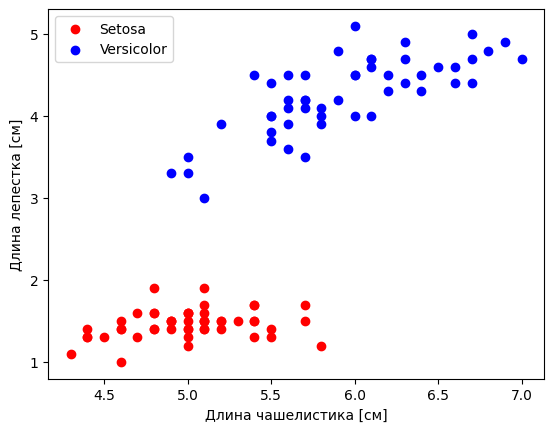

In [6]:
plt.scatter(
    X[y == 0, 0], X[y == 0, 1], 
    color='red', marker='o', label='Setosa'
)

plt.scatter(
    X[y == 1, 0], X[y == 1, 1], 
    color='blue', marker='o', label='Versicolor'
)

plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

##### Обучем алгоритм персептрона на подмножестве данных.

In [7]:
ppn = Perceptron(eta0=0.1, max_iter=15)
ppn.fit(X, y)

Perceptron(eta0=0.1, max_iter=15)

##### Строим график кол-ва ошибок и эпох.

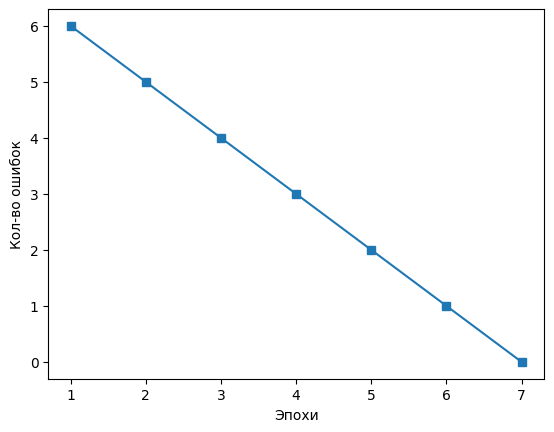

In [8]:
errors = []
for epoch in range(1, ppn.n_iter_ + 1):
    errors.append(ppn.n_iter_ - epoch)
plt.plot(range(1, len(errors) + 1), errors, marker='s')
plt.xlabel('Эпохи')
plt.ylabel('Кол-во ошибок')
plt.show()

##### Создаем фун-ию визуализации решающих границ.

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Определяем маркеры и цвета для классов
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Определяем границы графика
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создаём сетку точек
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    # Предсказываем классы для каждой точки сетки
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # Отображаем границы областей
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Отображаем точки данных
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

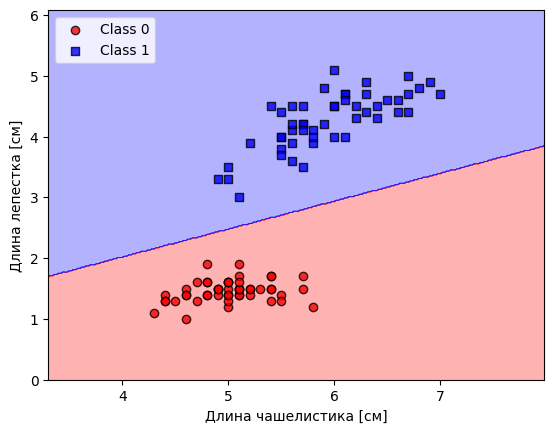

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()